<a href="https://colab.research.google.com/github/Nadera03/DATA-ENTHUSIAST/blob/main/Titanic_Disaster_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load dataset -Titanic
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/BushraAijaz/dataset/main/dataset_titanic(classification).csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.describe()

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
selected_features = df[['Age','Sex','Pclass','Fare','Survived']]
selected_features.isnull().sum()

Age         177
Sex           0
Pclass        0
Fare          0
Survived      0
dtype: int64

To clean dataset, we have two methods:
1. We remove the empty rows/data cell
2. We adjust the data using median method


In [ ]:
selected_features.dropna(inplace = True)
selected_features.isnull().sum()
selected_features.shape

<ipython-input-12-ebfdbc745b60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features.dropna(inplace = True)


(714, 5)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lblEnco = LabelEncoder()
selected_features['Sex'] = lblEnco.fit_transform(selected_features['Sex'])


In [ ]:
#seperation of dataset as X and y
X = selected_features[['Age','Sex','Pclass','Fare']]
y= selected_features['Survived']
X.shape, y.shape

#dataset is prepared: loading, feature selection, cleaning, encoding, seperation

In [ ]:
# 2. Implementation of Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
DT_clf = DecisionTreeClassifier()
DT_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#3. Prediction of survivals
predictions = DT_clf.predict(X_test)
predictions

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,predictions)
score

0.7762237762237763

In [ ]:
DT_clf.feature_importances_ #'Age','Sex','Pclass','Fare'

array([0.30819698, 0.31900163, 0.12298859, 0.2498128 ])

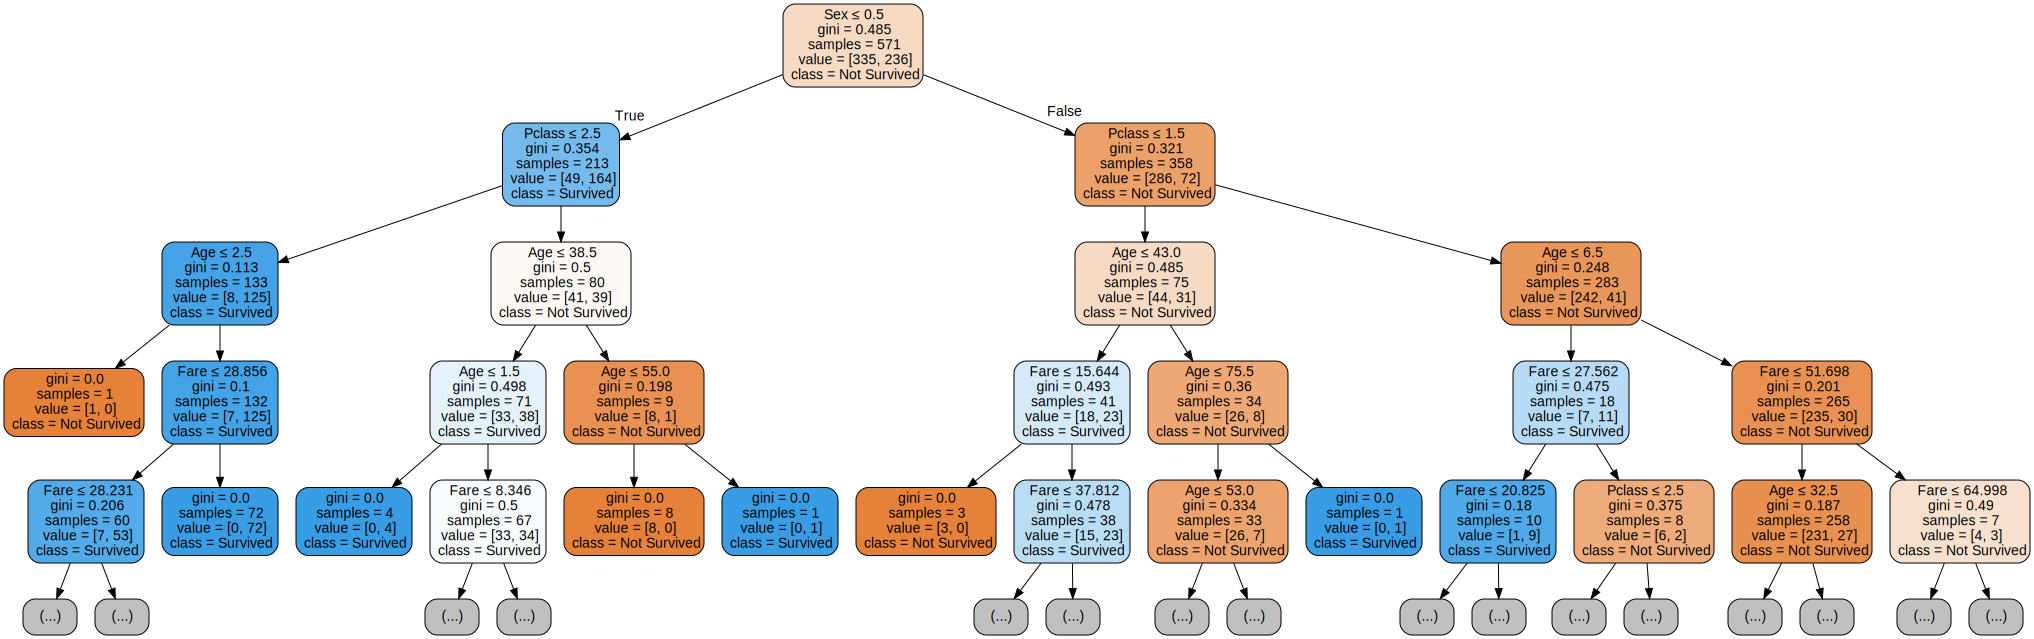

In [ ]:
#4. Model Visualization
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

dot_model = export_graphviz(DT_clf,
                            out_file = None,
                            filled= True,
                            rounded = True,
                            class_names = ['Not Survived', 'Survived'],
                            special_characters = True,
                            feature_names = X.columns,
                            max_depth = 4,
                            label = 'all')

graph = graphviz.Source(dot_model)
graph